# EDA Student Performance Indicator

## 1) Problem Statement 
 - This project understands how the student's performence (test scores) is affected by other variables such as Gender, Ethnicity, parental lavel of education, Lunch and Test preparation course.

## 2) Data Information  
 - The Data consists of 8 columns and 1000 rows.
 - gender : sex of the students -> (male/female)
 - race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
 - parental level of education : parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
 - lunch : having lunch before test(standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 3.Data Checks to perform
    - Check missing values
    - Check Duplicates
    - Check data type
    - Check the number of unique values of each column
    - Check statisics of the data set
    - Check various Categories in the different categorical column

In [5]:
## Check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insights or Observation 
    There are no missing values

In [6]:
## Check Duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

In [8]:
## Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
### Check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [14]:
### Check statisics of the data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
    - From the above description of numerical data, all means are very close to each other- between 66 and 69.
    - All the standard deviation are also close - between 14.6  - 15.19.
    - While there is a minimum of 0 for the maths, other having 17 and 10 value.

In [15]:
## Explore more info about the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
### Segrregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [17]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [18]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [19]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [20]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [21]:
### Aggregate the total score with mean

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']  = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='average_score', ylabel='Count'>

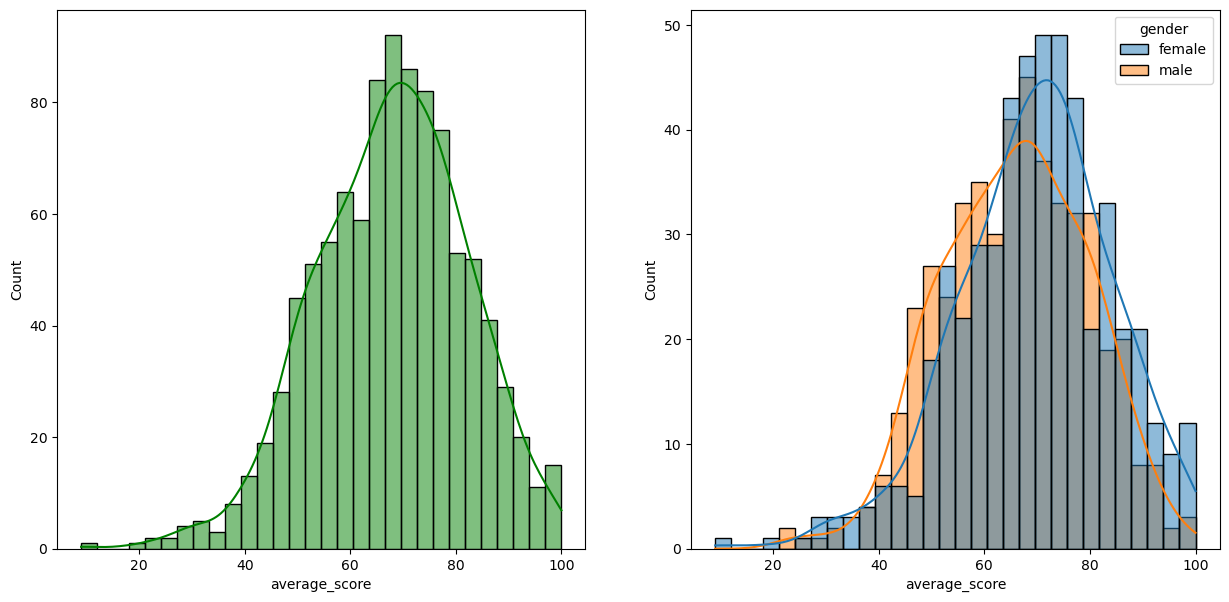

In [22]:
### Explore Visualization 
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score',bins = 30, kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data= df, x = 'average_score', bins = 30, kde = True, hue = 'gender')

## Insights
    -  Female Student tend to perform well than male students

<AxesSubplot:title={'center':'Male Vs Average Score'}, xlabel='average_score', ylabel='Count'>

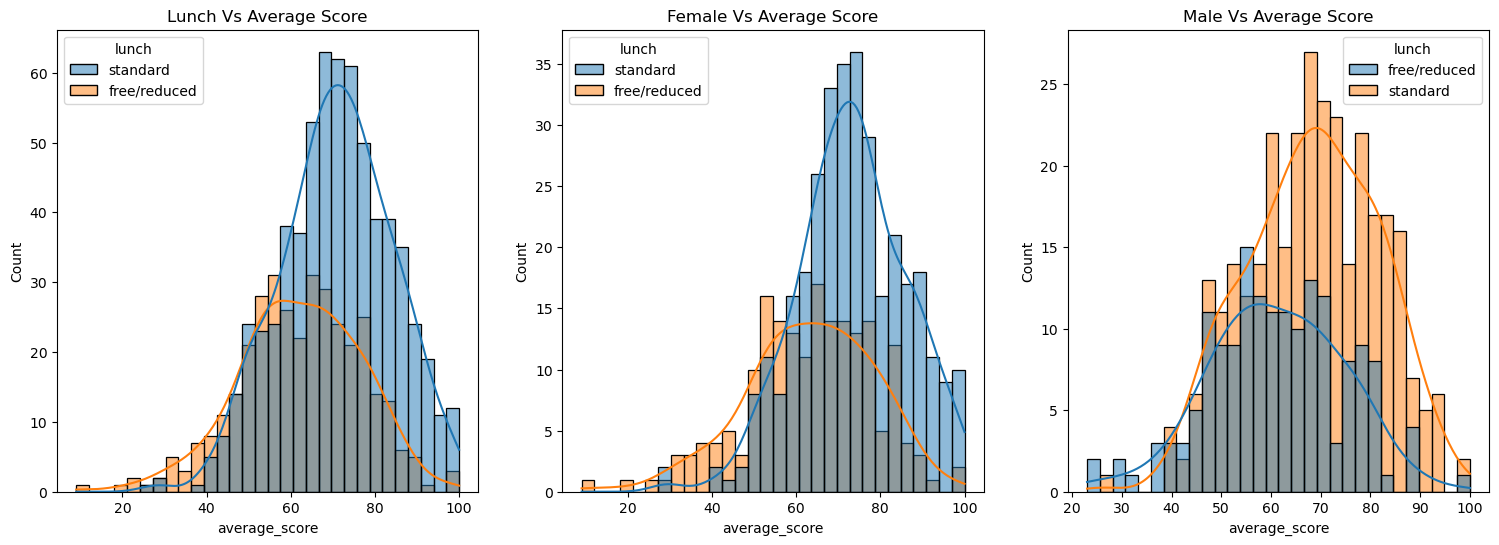

In [23]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
plt.title('Lunch Vs Average Score')
sns.histplot(data=df, x = 'average_score',bins = 30, kde = True,hue = 'lunch')
plt.subplot(142)
plt.title('Female Vs Average Score')
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'lunch')
plt.subplot(143)
plt.title('Male Vs Average Score')
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'lunch')

## Insights
    - Standard Lunch helps students perform well in exams
    - Standerd Lunch helps perform well in exams be it a male or female

<AxesSubplot:title={'center':'Parental Level of Education of Male  Over Average Score'}, xlabel='average_score', ylabel='Count'>

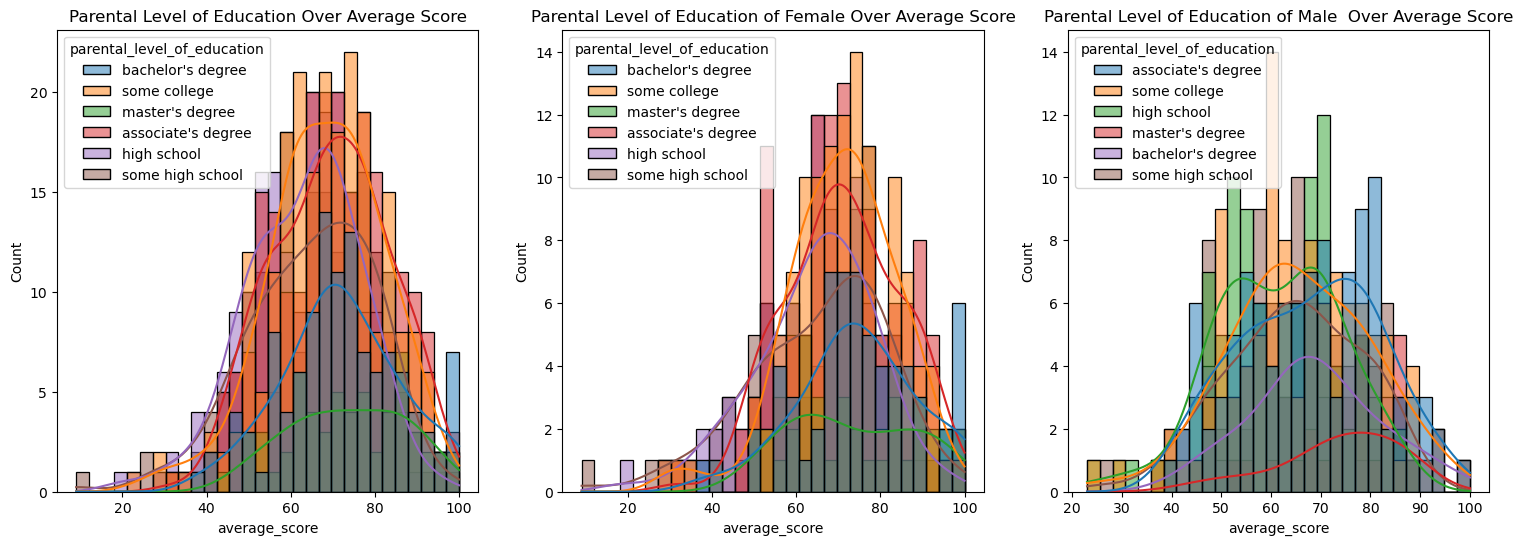

In [24]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
plt.title('Parental Level of Education Over Average Score')
sns.histplot(data=df, x = 'average_score',bins = 30, kde = True,hue = 'parental_level_of_education')
plt.subplot(142)
plt.title('Parental Level of Education of Female Over Average Score')
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
plt.title('Parental Level of Education of Male  Over Average Score')
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'parental_level_of_education')

### Insights 
    - In general parent's education don't help students perform well in exam.
    - 2nd plot we can see there is no effect of parent's education on frmale students.
    - 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to
    perform well in exam. 

<AxesSubplot:title={'center':'Race Rthnicity of Male Over Average Score'}, xlabel='average_score', ylabel='Count'>

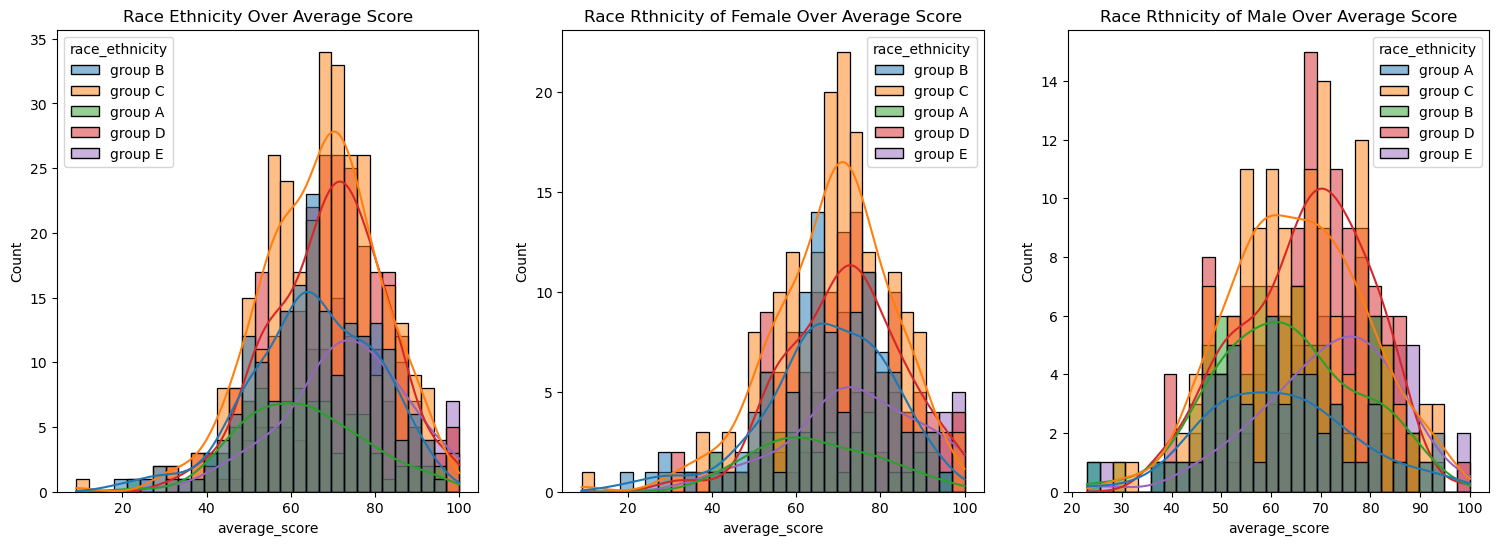

In [25]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
plt.title('Race Ethnicity Over Average Score')
sns.histplot(data=df, x = 'average_score',bins = 30, kde = True,hue = 'race_ethnicity')
plt.subplot(142)
plt.title('Race Rthnicity of Female Over Average Score')
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'race_ethnicity')
plt.subplot(143)
plt.title('Race Rthnicity of Male Over Average Score')
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'race_ethnicity')

### Insights
    - Students of Group A and Group B tends to perform poorly in exam.
    - Students of Group A and Group B to perform poorly in exam irrespective of whether they are Male or Female

<AxesSubplot:>

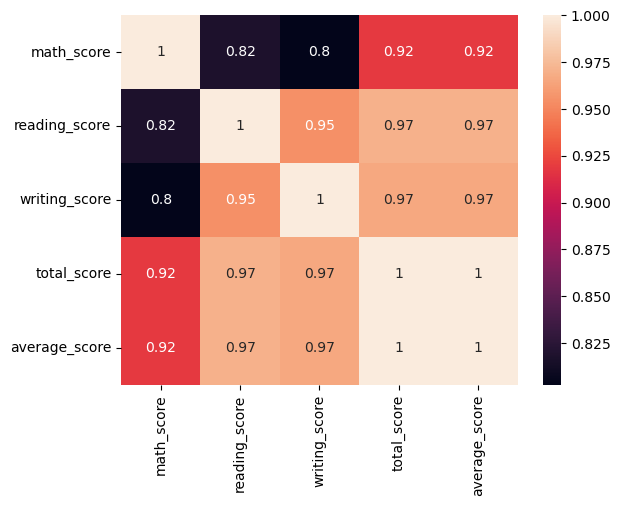

In [26]:
sns.heatmap(df.corr(), annot=True)